In [ ]:
#Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve


In [29]:
#cargar los archivos 
df = pd.read_excel('C:/Users/gonza/OneDrive/Desktop/machine learning/ramen-ratings.xlsx')
df.head()


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [31]:
#Análisis Exploratorio de los Datos
df.info()
df.describe()
df.isnull().sum()  # Verificamos valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

In [33]:
#limpieza de los datos
df.dropna(inplace=True)
df.isnull().sum()  # Verificamos que se han eliminado correctamente

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64

In [35]:
# Codificación de Variables Categóricas
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Country'] = le.fit_transform(df['Country'])
df['Variety'] = le.fit_transform(df['Variety'])
df['Style'] = le.fit_transform(df['Style'])


In [53]:
#División de Datos entrenamiento y prueba ,definimos la variable objetivo y y las variables predictoras X. Convertimos la columna Stars en una variable binaria: Bueno (>=3) vs Malo (<3).
X = df.drop('Stars', axis=1)
y = df['Stars'].apply(lambda x: 1 if x >= 3 else 0)  # 1 = Bueno, 0 = Malo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
print(X_train.head())
print(X_train.info())

      Review #  Brand  Variety  Style  Country  Top Ten
942       1638      0       39      2        8   2015.0
1757       823     14       15      2        7   2013.0
1109      1471      6        9      2        9   2013.0
1278      1302      6       10      2        9   2014.0
1059      1521      8        6      3        3   2015.0
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 942 to 2535
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  32 non-null     int64  
 1   Brand     32 non-null     int32  
 2   Variety   32 non-null     int32  
 3   Style     32 non-null     int32  
 4   Country   32 non-null     int32  
 5   Top Ten   29 non-null     float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 1.2 KB
None


In [59]:
print(X_train['Top Ten'].head())
print(X_train['Top Ten'].dtype)


942     2015.0
1757    2013.0
1109    2013.0
1278    2014.0
1059    2015.0
Name: Top Ten, dtype: float64
float64


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
print(X_train_scaled[:5])
print(X_test_scaled[:5])


[[ 0.95584374 -1.85146758  1.50958183 -0.1796053   1.44538946  0.80849333]
 [-0.42645662  0.75688926 -0.41306965 -0.1796053   1.02105494 -0.61249495]
 [ 0.67259937 -0.73360036 -0.89373253 -0.1796053   1.86972398 -0.61249495]
 [ 0.38596285 -0.73360036 -0.81362205 -0.1796053   1.86972398  0.09799919]
 [ 0.75740308 -0.36097796 -1.13406396  2.69407953 -0.67628314  0.80849333]]
[[-0.2381924   0.57057806 -0.65340109 -0.1796053   2.2940585  -0.61249495]
 [ 0.664119   -0.73360036  0.22781417 -0.1796053   1.86972398  0.80849333]
 [ 0.86595182 -1.66515638  0.14770369 -0.1796053  -0.25194862  0.80849333]
 [-0.27889818  0.75688926  0.06759322 -5.92697497  1.02105494         nan]
 [ 1.27809781  1.68844528  0.62836657 -0.1796053   1.44538946  1.51898747]]


In [69]:
#Imputación de valores faltantes en los datos originales
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [71]:
#Escalo los datos nuevamente: Una vez que los valores faltantes han sido imputados, aplic0 el escalador StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [73]:
#Confirma la ausencia de Nan
print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())


0
0


In [79]:
#Entrenar los modelos,librerias 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [95]:
!pip install imbalanced-learn

In [105]:
print(X.shape)
print(y.shape)
print(y.head())
print(X.info())


(41, 6)
(41,)
616    1
633    1
655    1
673    1
752    1
Name: Stars, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 616 to 2567
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  41 non-null     int64  
 1   Brand     41 non-null     int32  
 2   Variety   41 non-null     int32  
 3   Style     41 non-null     int32  
 4   Country   41 non-null     int32  
 5   Top Ten   37 non-null     float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 1.6 KB
None


In [109]:
print(X.isnull().sum())


Review #    0
Brand       0
Variety     0
Style       0
Country     0
Top Ten     0
dtype: int64


In [115]:
print(pd.Series(y).value_counts())


Stars
1    40
0     1
Name: count, dtype: int64


In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(solver='saga', max_iter=5000, tol=0.01)
log_reg.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred = log_reg.predict(X_test_scaled)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [141]:
print(X_train_scaled[:5])  # Verifica los datos escalados


[[-0.61518614  0.29405283 -0.73537908 -0.76017848  0.47348719 -0.07736527]
 [-0.61518614  0.29405283 -0.73537908 -0.76017848  0.47348719 -0.07736527]
 [-0.61518614  0.29405283 -0.73537908 -0.76017848  0.47348719 -0.07736527]
 [-1.19778379  1.53217    -0.42625421  0.80922225 -1.58096571 -2.23565789]
 [ 1.5563142  -0.94406434 -0.34897299  2.37862298 -1.58096571  1.28743742]]


In [188]:
#Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


In [190]:
#Entrenar modelos (Regresión Logística y SVM) ,entrenar un modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Modelo de Regresión Logística con hiperparámetros iniciales
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predecir y evaluar
y_pred_log = log_reg.predict(X_test)
print("Reporte de Clasificación - Regresión Logística:\n")
print(classification_report(y_test, y_pred_log))


Reporte de Clasificación - Regresión Logística:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



In [216]:
#Entrenar un modelo de Support Vector Machine (SVM):
from sklearn.svm import SVC

# Modelo SVM con hiperparámetros iniciales
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svm = svm_model.predict(X_test)
print("Reporte de Clasificación - SVM:\n")
print(classification_report(y_test, y_pred_svm))


Reporte de Clasificación - SVM:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



In [218]:
#Realizar una búsqueda de hiperparámetros (GridSearchCV)
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a buscar
param_grid_log = {
    'C': [0.1, 1, 10, 100],  # Regularización
    'solver': ['lbfgs', 'liblinear']  # Algoritmos para optimización
}

# Configurar GridSearchCV
grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                        param_grid_log, 
                        cv=5, 
                        scoring='accuracy')

# Entrenar y buscar los mejores hiperparámetrosa
grid_log.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros (Regresión Logística):", grid_log.best_params_)
print("Mejor precisión:", grid_log.best_score_)


Mejores hiperparámetros (Regresión Logística): {'C': 0.1, 'solver': 'lbfgs'}
Mejor precisión: 0.9525641025641025


In [220]:
#Búsqueda de hiperparámetros para SVM:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a buscar
param_grid_log = {
    'C': [0.1, 1, 10, 100],  # Regularización
    'solver': ['lbfgs', 'liblinear']  # Algoritmos para optimización
}

# Configurar GridSearchCV
grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                        param_grid_log, 
                        cv=5, 
                        scoring='accuracy')

# Entrenar y buscar los mejores hiperparámetros
grid_log.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros (Regresión Logística):", grid_log.best_params_)
print("Mejor precisión:", grid_log.best_score_)


Mejores hiperparámetros (Regresión Logística): {'C': 0.1, 'solver': 'lbfgs'}
Mejor precisión: 0.9525641025641025


In [222]:
# Definir los parámetros a buscar
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularización
    'kernel': ['linear', 'rbf'],  # Tipo de kernel
    'gamma': ['scale', 'auto']  # Coeficiente del kernel
}

# Configurar GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), 
                        param_grid_svm, 
                        cv=5, 
                        scoring='accuracy')

# Entrenar y buscar los mejores hiperparámetros
grid_svm.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros (SVM):", grid_svm.best_params_)
print("Mejor precisión:", grid_svm.best_score_)


Mejores hiperparámetros (SVM): {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor precisión: 1.0


In [224]:
# Evaluar Regresión Logística:Usar el mejor modelo encontrado por GridSearchCV
best_log_model = grid_log.best_estimator_

# Predecir y evaluar
y_pred_best_log = best_log_model.predict(X_test)
print("Reporte de Clasificación - Regresión Logística (mejores parámetros):\n")
print(classification_report(y_test, y_pred_best_log))


Reporte de Clasificación - Regresión Logística (mejores parámetros):

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



In [226]:
#Evaluar SVM: Usar el mejor modelo encontrado por GridSearchCV
best_svm_model = grid_svm.best_estimator_

# Predecir y evaluar
y_pred_best_svm = best_svm_model.predict(X_test)
print("Reporte de Clasificación - SVM (mejores parámetros):\n")
print(classification_report(y_test, y_pred_best_svm))


Reporte de Clasificación - SVM (mejores parámetros):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



AUC-ROC (Regresión Logística): 0.91
Reporte de Clasificación - Regresión Logística:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.91      0.95        11

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



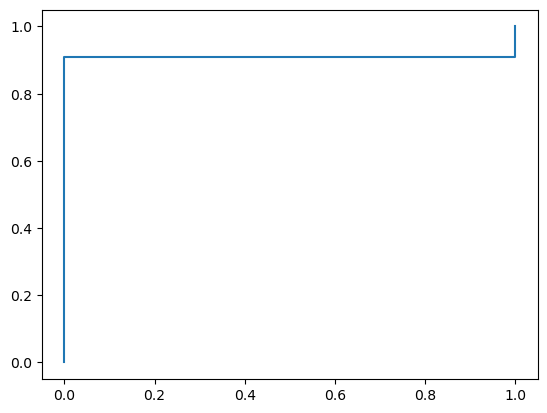

In [228]:
#Cálculo de las métricas:Evaluar Regresión Logística:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicciones de probabilidad
y_prob_log = best_log_model.predict_proba(X_test)[:, 1]

# Cálculo del AUC-ROC
auc_log = roc_auc_score(y_test, y_prob_log)
print(f"AUC-ROC (Regresión Logística): {auc_log:.2f}")

# Reporte de clasificación
y_pred_best_log = best_log_model.predict(X_test)
print("Reporte de Clasificación - Regresión Logística:\n")
print(classification_report(y_test, y_pred_best_log))

# Curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label=f'Reg. Logística (AUC = {auc_log:.2f})')


AUC-ROC (SVM): 1.00
Reporte de Clasificación - SVM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



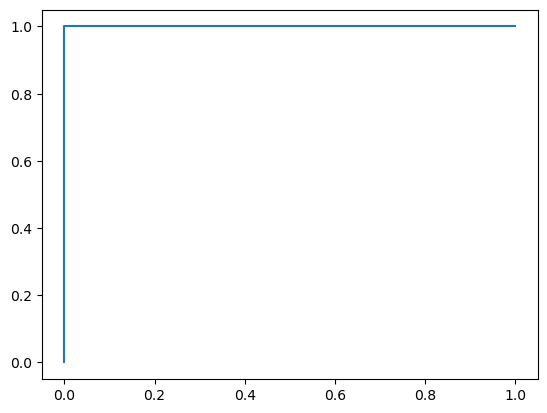

In [230]:
# Evaluar SVM:Predicciones de probabilidad
y_prob_svm = best_svm_model.predict_proba(X_test)[:, 1]

# Cálculo del AUC-ROC
auc_svm = roc_auc_score(y_test, y_prob_svm)
print(f"AUC-ROC (SVM): {auc_svm:.2f}")

# Reporte de clasificación
y_pred_best_svm = best_svm_model.predict(X_test)
print("Reporte de Clasificación - SVM:\n")
print(classification_report(y_test, y_pred_best_svm))

# Curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')


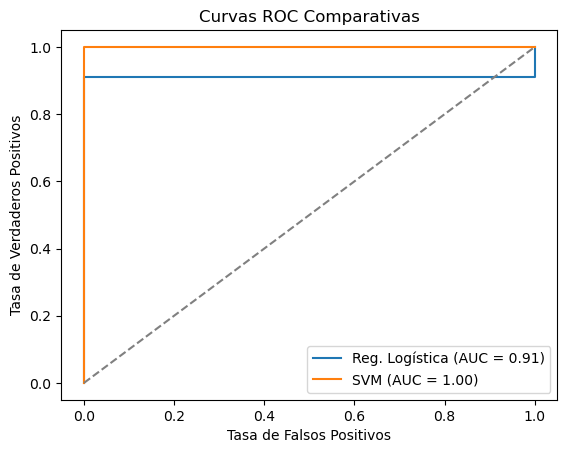

In [232]:
# Graficar la curva ROC de Regresión Logística
plt.plot(fpr_log, tpr_log, label=f'Reg. Logística (AUC = {auc_log:.2f})')

# Graficar la curva ROC de SVM
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

# Línea de referencia (aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Comparativas')

# Agregar leyenda
plt.legend(loc='lower right')
plt.show()


In [ ]:
#concluciones
-Regresión Logística (AUC = 0.91):
Desempeño general:
Un AUC de 0.91 indica que el modelo tiene un muy buen desempeño para distinguir entre las clases "bueno" y "malo".
-La curva ROC está consistentemente por encima de la diagonal de referencia, mostrando una alta sensibilidad y especificidad.

#Support Vector Machine (AUC = 1.00):
Desempeño general:
El AUC de 1.00 indica que el modelo tiene un rendimiento perfecto en este conjunto de datos.
La curva ROC muestra que el modelo clasifica correctamente todos los ejemplos de prueba sin errores.
